# Table of Contents
Introduction
Import
Analysis & Preprocessing
Model
Training
Analysis & Conclusion

# 1. Introduction
References:

- https://machinelearningmastery.com/feature-selection-for-regression-data/
- https://www.analyticsvidhya.com/blog/2021/08/a-walk-through-of-regression-analysis-using-artificial-neural-networks-in-tensorflow/
- https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
- https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/
- https://www.studytonight.com/post/what-is-mean-squared-error-mean-absolute-error-root-mean-squared-error-and-r-squared#:~:text=MAE%3A%20It%20is%20not%20very,the%20weighted%20individual%20differences%20equally.

# 2. Import

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import pyplot
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils, callbacks
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import matplotlib.pyplot as plt
import numpy as np 
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 3. Analysis & Preprocessing

In [2]:
data = pd.read_excel('../../data_sets/Volumetric_features.xlsx')
data_feat = pd.DataFrame(data, columns = data.columns[:-1])
data_feat = data_feat.drop(['S.No','Age'], axis=1)

data.head(5)
data.describe()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,...,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000
mean,2113.500000,13370.040795,574.849716,14646.696711,52002.811571,7164.947539,3337.653526,4505.158755,1958.214458,1418.947373,...,2.429779,2.684327,3.555803,2.288283,2.846123,2.372266,1.085468e+06,1.514925e+06,58.374586,4.533838
std,1220.085448,9194.928348,594.590387,2622.868798,6378.435917,1207.229615,502.352001,713.658580,287.139826,635.143286,...,0.185543,0.275245,0.332094,0.269851,0.195038,0.146944,1.248881e+05,1.651798e+05,20.064099,3.057928
min,1.000000,2204.100000,0.000000,6920.100000,29911.800000,4145.400000,1035.600000,2294.000000,851.900000,39.700000,...,1.345000,1.655000,1.940000,1.176000,1.533000,1.483290,6.279600e+05,8.329815e+05,18.000000,1.000000
25%,1057.250000,7031.625000,243.200000,12909.875000,47359.675000,6239.425000,2984.500000,4008.125000,1764.700000,941.825000,...,2.309000,2.510000,3.360000,2.105000,2.720000,2.274935,9.957585e+05,1.404471e+06,43.000000,1.000000
50%,2113.500000,10669.950000,385.800000,14277.000000,51333.650000,7032.150000,3294.050000,4438.100000,1940.100000,1225.450000,...,2.440500,2.685000,3.586500,2.297000,2.851000,2.383375,1.075919e+06,1.511767e+06,61.000000,4.000000
75%,3169.750000,17332.650000,720.825000,15959.725000,56287.775000,7977.400000,3655.125000,4963.025000,2128.000000,1780.225000,...,2.562750,2.851000,3.790000,2.476000,2.975000,2.483142,1.168888e+06,1.625445e+06,76.000000,8.000000
max,4226.000000,79812.500000,7533.800000,35042.500000,79948.200000,13008.300000,6018.000000,8446.100000,4357.700000,4461.600000,...,2.996000,3.928000,4.487000,3.123000,3.482000,2.803730,1.545129e+06,2.075213e+06,96.000000,9.000000


In [3]:
scaler = StandardScaler()
x = scaler.fit_transform(data_feat)
n = 20
pca = PCA(n_components=n)
pca_data = pca.fit_transform(x)

labels = data_feat.columns.values.tolist()
label_index = [np.abs(pca.components_[i]).argmax() for i in range(n)]
columns = [labels[label_index[i]] for i in range(n)]

pca_df = pd.DataFrame(data=pca_data, columns=columns)
print(pca_df.head)
pca_df.head()

<bound method NDFrame.head of       rh_MeanThickness_thickness  CerebralWhiteMatterVol  \
0                       1.754402                1.293661   
1                       1.417516                1.506793   
2                       2.060537                1.356492   
3                       4.321472                1.316560   
4                       3.432616                1.645478   
...                          ...                     ...   
4221                    3.508241                2.349696   
4222                    4.445945               -2.409496   
4223                    8.016491                2.326577   
4224                   -0.596625                2.547033   
4225                   -2.307309               -3.481649   

      Left-Lateral-Ventricle  lh_pericalcarine_thickness  SurfaceHoles  \
0                   1.400035                   -1.478872     -1.847496   
1                   1.653987                   -0.614048     -1.384830   
2                   1.48895

,rh_MeanThickness_thickness,CerebralWhiteMatterVol,Left-Lateral-Ventricle,lh_pericalcarine_thickness,SurfaceHoles,CC_Posterior,rh_caudalanteriorcingulate_thickness,CC_Posterior,Right-Caudate,lh_parahippocampal_thickness,MaskVol-to-eTIV,Brain-Stem,Left-vessel,Right-vessel,non-WM-hypointensities,rh_isthmuscingulate_thickness,5th-Ventricle,non-WM-hypointensities,5th-Ventricle,5th-Ventricle
0,1.754402,1.293661,1.400035,-1.478872,-1.847496,2.543808,-1.131069,-0.411168,-0.375874,1.575706,-0.215381,0.175385,-1.594659,0.590112,-0.419819,0.490388,0.210059,-0.255816,0.745396,-0.548675
1,1.417516,1.506793,1.653987,-0.614048,-1.384830,2.367862,-1.435384,-0.854679,-0.772121,1.730385,0.194947,0.374460,-1.466169,0.229012,-0.858767,0.179173,-0.294345,-0.241843,1.224005,-0.287636
2,2.060537,1.356492,1.488951,-1.055340,-1.174998,2.164486,-2.159995,-0.820318,-1.129607,1.481564,0.072066,0.312901,-0.851789,0.768033,-0.818180,0.456272,-0.468695,-0.019350,0.983764,0.133955
3,4.321472,1.316560,1.100195,-0.240310,-1.374512,2.415121,-1.136740,-1.573520,-0.824431,1.332201,0.288752,-0.333657,-1.369837,0.511955,-0.327659,0.142232,-0.358880,-0.033206,0.886275,-0.056838
4,3.432616,1.645478,2.126633,-0.804793,-1.322204,3.079020,-1.200164,-0.815543,-0.544645,1.522294,-0.082370,0.416392,-1.480764,1.228200,-0.870006,0.017986,0.276737,-0.136212,1.185145,-0.515933


In [21]:
# Split for validation --> train, val, test = 80/15/5
# train to test (val and test) --> include random shuffle
x_train, x_validation, y_train, y_validation = train_test_split(pca_df, data['Age'], test_size=0.20, random_state=33)

# (20% of total dataset -> 75% validation = 15% total, 25% validation = 5% total
# val and test --> include random shuffle
x_val, x_test, y_val, y_test = train_test_split(x_validation, y_validation, test_size=0.25, random_state=33)

print("x_train shape is:",x_train.shape)
print("y_train shape is:",y_train.shape, "\n")
print("x_val shape is:",x_val.shape)
print("y_val shape is:",y_val.shape, "\n")
print("x_test shape is:",x_test.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (3380, 20)
y_train shape is: (3380,) 

x_val shape is: (634, 20)
y_val shape is: (634,) 

x_test shape is: (212, 20)
y_test shape is: (212,)


# 4. Model

In [25]:
# end with 3 neurons for each class --> 1 (Normal), 2 (Suspect) and 3 (Pathological)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=x_train.shape[1], name='input'))

model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(1, activation='linear', name='output'))


opt = Adam(learning_rate=0.001)

model.compile(
            loss='mean_absolute_error',
            optimizer=opt,
            metrics= ['mean_absolute_error']
            )

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 64)                1344      
                                                                 
 activation_25 (Activation)  (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 128)               8320      
                                                                 
 activation_26 (Activation)  (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 256)               33024     
                                                                 
 activation_27 (Activation)  (None, 256)               0         
                                                                 
 dense_28 (Dense)            (None, 128)              

# 5. Training

In [26]:
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=10, restore_best_weights = True)
# loss function
msle = MeanSquaredLogarithmicError()

model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=0.001), 
    metrics=['msle']
)
# train the model
hist = model.fit(
    x_train, 
    y_train, 
    epochs=100, 
    batch_size=128,
    verbose=1,
    validation_data=(x_val, y_val), 
    callbacks = [earlystopping]
)

Epoch 1/100
27/27 [==============================] - 1s 12ms/step - loss: 3.7670 - msle: 3.7670 - val_loss: 0.3715 - val_msle: 0.3715
Epoch 2/100
27/27 [==============================] - 0s 7ms/step - loss: 0.3261 - msle: 0.3261 - val_loss: 0.2001 - val_msle: 0.2001
Epoch 3/100
27/27 [==============================] - 0s 8ms/step - loss: 0.1860 - msle: 0.1860 - val_loss: 0.1632 - val_msle: 0.1632
Epoch 4/100
27/27 [==============================] - 0s 7ms/step - loss: 0.1463 - msle: 0.1463 - val_loss: 0.1355 - val_msle: 0.1355
Epoch 5/100
27/27 [==============================] - 0s 7ms/step - loss: 0.1208 - msle: 0.1208 - val_loss: 0.1158 - val_msle: 0.1158
Epoch 6/100
27/27 [==============================] - 0s 7ms/step - loss: 0.1029 - msle: 0.1029 - val_loss: 0.1012 - val_msle: 0.1012
Epoch 7/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0908 - msle: 0.0908 - val_loss: 0.0920 - val_msle: 0.0920
Epoch 8/100
27/27 [==============================] - 0s 7ms/step - l

# 6. Analysis & Conclusion

In [27]:
y_pred = model.predict(x_test)

print("Explained variance: " + str(metrics.explained_variance_score(y_test, y_pred)))
print("Max Error: " + str(metrics.max_error(y_test, y_pred)))
print("Mean absolute error: " + str(metrics.mean_absolute_error(y_test, y_pred)))
print("Mean squared error: " + str(metrics.mean_squared_error(y_test, y_pred)))
print("Root Mean squared error: " + str(metrics.mean_squared_error(y_test, y_pred, squared=False)))
print("R2: " + str(metrics.r2_score(y_test, y_pred)))

Explained variance: 0.828164883556715
Max Error: 33.99394226074219
Mean absolute error: 6.014110430231634
Mean squared error: 67.98508997972411
Root Mean squared error: 8.245307148901373
R2: 0.8266078968373053


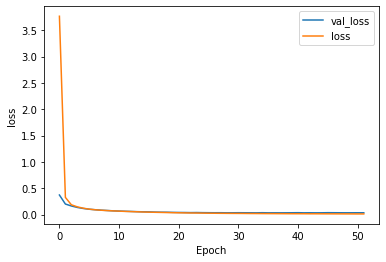

In [28]:
x = list(range(52))
vy = hist.history['val_loss']
ty = hist.history['loss']

plt.plot( x, vy, label='val_loss')
plt.plot( x, ty, label='loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()